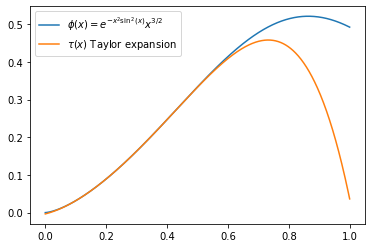

In [10]:
import numpy as np
from matplotlib import pyplot as plt

data1 = np.loadtxt('./02_phi.txt')
data2 = np.loadtxt('./02_tau.txt')

x = np.linspace(0, 1, 1001)

plt.plot(x,data1,label=r"$\phi(x) = e^{-x^2\sin^2(x)}x^{3/2}$")
plt.plot(x,data2,label=r"$\tau(x)$ Taylor expansion")
plt.legend()

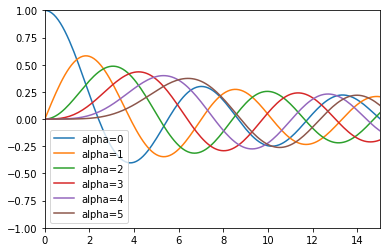

In [29]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('./03_bessel.txt')
data = data.reshape(6,202)
xx = np.linspace(0, 20, 201)

for i in range(6):
    plt.plot(xx,data[i][1:],label="alpha="+str(i))
plt.xlim(0,15)
plt.ylim(-1,1)
plt.legend()

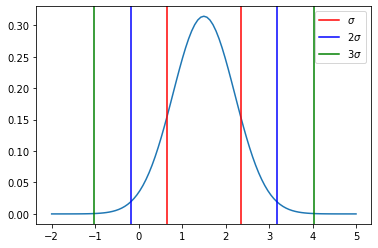

In [8]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('05_pdf.txt')
plt.plot(data[:, 0], data[:, 1])

mean = 1.5
sigma = 0.843462288
plt.axvline(mean+sigma, color='r', label=r"$\sigma$")
plt.axvline(mean-sigma, color='r')
plt.axvline(mean+2*sigma, color='b', label=r"$2\sigma$")
plt.axvline(mean-2*sigma, color='b')
plt.axvline(mean+3*sigma, color='g', label=r"$3\sigma$")
plt.axvline(mean-3*sigma, color='g')
plt.legend()

# Curve fitting: method of least squares

$$\Pi\equiv\sum_{i=1}^Nd_i^2=\sum_{i=1}^N(y_i-f(x_i))^2=minimum$$

## Linear least-square

$$\Pi\equiv\sum_{i=1}^Nd_i^2=\sum_{i=1}^N(y_i-(a+bx+i))^2$$

The best-fit coefficients a and b can be determined by minimizing $\Pi$:

$$\frac{\partial\Pi}{\partial a}=2\sum_{i=1}^N(y_i-(a+bx+i))=0$$

$$\frac{\partial\Pi}{\partial b}=2\sum_{i=1}^Nx_i(y_i-(a+bx+i))=0$$

$$\sum_{i=1}^Ny_i = a\sum_{i=1}^N1+b\sum_{i=1}^Nx_i$$

$$\sum_{i=1}^Nx_iy_i=a\sum_{i=1}^Nx_i+b\sum_{i=1}^Nx_i^2$$

$$a=\dfrac{(\sum_{i=1}^Ny_i)(\sum_{i=1}^Nx_i^2)-(\sum_{i=1}^Nx_i)(\sum_{i=1}^Nx_iy_i)}{N(\sum_{i=1}^Nx_i^2)-(\sum_{i=1}^Nx_i)^2}$$

$$b=\dfrac{N(\sum_{i=1}^Nx_iy_i)-(\sum_{i=1}^Nx_i)(\sum_{i=1}^Ny_i)}{N(\sum_{i=1}^Nx_i^2)-(\sum_{i=1}^Nx_i)^2}$$

## Quadratic least-squares

$$\Pi\equiv\sum_{i=1}^Nd_i^2=\sum_{i=1}^N(y_i-(a+bx_i+cx_i^2))^2=minimum$$

$$\frac{\partial\Pi}{\partial a}=\frac{\partial\Pi}{\partial b}=\frac{\partial\Pi}{\partial c}=0$$

$$\sum_{i=1}^Ny_i=a\sum_{i=1}^N1+b\sum_{i=1}^Nx_i+c\sum_{i=1}^Nx_i^2$$

$$\sum_{i=1}^Nx_iy_i = a\sum_{i=1}^Nx_i+b\sum_{i=1}^Nx_i^2+c\sum_{i=1}^Nx_i^3$$

$$\sum_{i=1}^Nx_i^2y_i=a\sum_{i=1}^Nx_i^2+b\sum_{i=1}^Nx_i^3+c\sum_{i=1}^Nx_i^4$$

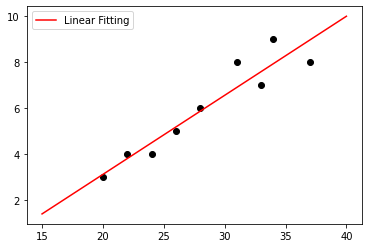

In [10]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('08_data.txt')
plt.scatter(data[:,0], data[:,1], color='k')

x = np.linspace(15, 40, 10)
y = x*0.344 - 3.759
plt.plot(x, y, color='r', label="Linear Fitting")
plt.legend()

# Numerical differentiation

Taylor series expansion of function $f(x)$:

$$f(x+\Delta x) = f(x)+f'(x)\Delta x+\frac{f''(x)}{2!}\Delta x^2+\frac{f'''(x)}{3!}\Delta x^3+\cdots$$

where $\Delta x << x$.

## 1st-order derivative
### leap-frog (central difference) differentiation

Evaluating the Taylor expansion at $x+\Delta x$ and $x-\Delta x$ leads to:

$$f(x+\Delta x)\approx f(x)+f'(x)\Delta x+\frac{f''(x)}{2!}\Delta x^2+\frac{f'''(x)}{3!}\Delta x^3$$

$$f(x-\Delta x)\approx f(x)-f'(x)\Delta x+\frac{f''(x)}{2!}\Delta x^2-\frac{f'''(x)}{3!}\Delta x^3$$

$$f(x+\Delta x)-f(x-\Delta x)\approx 2f'(x)\Delta x +2\frac{f'''(x)}{3!}\Delta x^3$$

$$f'(x)\approx \frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x}$$

### Euler forward differentiation

$$f'(x)\approx \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

### Euler backward differentiation

$$f'(x)\approx \frac{f(x)-f(x)}{\Delta x}$$

## 2nd-order derivative

### three-point rule

$$f''(x)\approx \frac{f(x+\Delta x)-2f(x)+f(x-\Delta x)}{\Delta x^2}$$

### five-point rule

$$f''(x)\approx \frac{-f(x+2\Delta x)+16f(x+\Delta x)-30f(x)+16f(x-\Delta x)-f(x-2\Delta x)}{12\Delta x^2}$$

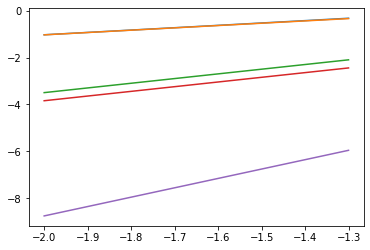

In [1]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('09_err.txt')
x = np.linspace(0.01, 0.05, 5)
for i in range(5):
    plt.plot(np.log10(x), np.log10(abs(data))[i])